In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
years = 5
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

In [4]:
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [5]:
adj_close = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker,start = startDate,end = endDate)
    adj_close[ticker] = data['Adj Close']

print(adj_close)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2018-10-09  264.388092  68.560349  112.599998  173.754807  135.486389
2018-10-10  256.016663  68.507538  112.879997  166.113190  131.171371
2018-10-11  250.377472  68.701202  115.779999  164.052841  128.374420
2018-10-12  253.854874  68.683578  115.230003  168.618500  130.067276
2018-10-15  252.429001  68.666008  116.000000  166.577515  129.487640
...                ...        ...         ...         ...         ...
2023-10-02  427.309998  69.110001  169.649994  361.260010  212.130005
2023-10-03  421.589996  6

In [11]:
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2018-10-10 -0.032176 -0.000771  0.002484 -0.044976 -0.032367
2018-10-11 -0.022273  0.002823  0.025367 -0.012481 -0.021553
2018-10-12  0.013793 -0.000257 -0.004762  0.027450  0.013101
2018-10-15 -0.005633 -0.000256  0.006660 -0.012178 -0.004466
2018-10-16  0.021630  0.000768 -0.001726  0.028677  0.021788
...              ...       ...       ...       ...       ...
2023-10-02 -0.000398 -0.006893 -0.010554  0.008311 -0.001319
2023-10-03 -0.013476 -0.008136 -0.002892 -0.017705 -0.014626
2023-10-04  0.007256  0.006543 -0.000118  0.013517  0.007197
2023-10-05 -0.000377  0.000724 -0.001834 -0.002951 -0.000523
2023-10-06  0.011803 -0.003918  0.005140  0.016617  0.011856

[1256 rows x 5 columns]


In [13]:
portofolio_value = 100000
# This line creates an array of equal weights for each ticker in the list 'tickers'
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [14]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2018-10-10   -0.021561
2018-10-11   -0.005624
2018-10-12    0.009865
2018-10-15   -0.003175
2018-10-16    0.014228
                ...   
2023-10-02   -0.002171
2023-10-03   -0.011367
2023-10-04    0.006879
2023-10-05   -0.000992
2023-10-06    0.008300
Length: 1256, dtype: float64


In [15]:
days = 5

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2018-10-16   -0.006266
2018-10-17    0.014977
2018-10-18    0.010182
2018-10-19   -0.000446
2018-10-22    0.001466
                ...   
2023-10-02   -0.014733
2023-10-03   -0.015407
2023-10-04   -0.006079
2023-10-05   -0.010726
2023-10-06    0.000649
Length: 1252, dtype: float64


In [17]:
confidence_interval = .95

VaR = -np.percentile(range_returns,100 - (confidence_interval*100))*portofolio_value
print (VaR)

2910.1720074371465


In [21]:
VaR_rate = (VaR/portofolio_value) * 100
print (f'VaR rate for {days} days period at {confidence_interval} confidence interval is {VaR_rate}%')

VaR rate for 5 days period at 0.95 confidence interval is 2.9101720074371467%


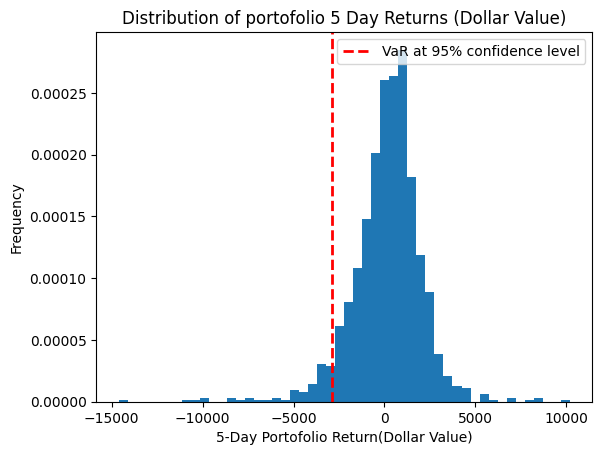

In [22]:
return_window = days 
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portofolio_value

plt.hist(range_returns_dollar.dropna(),bins=50,density=True)
plt.xlabel(f'{return_window}-Day Portofolio Return(Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of portofolio {return_window} Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r',linestyle='dashed',linewidth=2,label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()